# Домашнее задание 2

Используя датасет [STUDENT ALCOHOL CONSUMPTION](https://archive.ics.uci.edu/ml/datasets/STUDENT+ALCOHOL+CONSUMPTION#) и статью "USING	DATA	MINING	TO	PREDICT	SECONDARY SCHOOL	STUDENT	ALCOHOL	CONSUMPTION" выполните следующие задания:

### Предобработка (Max 2)
- Приведите описание признаков датасета на русском языке с указанием типа данных (0.3 балла)
- Предобработка данных (1.7)
    - Проверьте наличие пропусков. В случае наличия пропусков заполните их медианными значениями (0.4)
    - Подсчитайте количество людей, у которых матери с образованием "0" (0.4)
    - Преобразуйте все номинальные признаки в несколько признаков с бинарным значение (0.4)
    - Используя объект [SelectKBest](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest) с параметром [f_regression](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html#sklearn.feature_selection.f_regression)  выберите два признака, которые наиболее сильно связаны с признаком G3 (0.5)

sex: пол (категориальная, символ : "F" - женщина; "М" - мужчина)
age: возраст студента(количественная, целое число от 15 до 22)
school: школа студента (категориальная, строка символов : "GP" - Gabriel Pereira, "MS" - Mousinho da Silveira)
address: тип дома студента (категориальная, символ : "U" - город; "R" - сельская местность)
Pstatus: жизнь с родителями (категориальная, символ : "A" - раздельно; "T" - совместно)
Medy: образование матери (порядковая, целое число от 1 до 4: 1 - окончила до 4 класса школы; 2 - окончила 5 - 9 классов; 3 - среднее полное образование, 4 - высшее образование)
Mjob: местро работы матери (категориальная, строка символов: "health" - здравоохранение,"services" - сфера услуг, "teacher" - образование,"at_home" - по дому, "other" - другое)
traveltime: время поездки до учебы (порядковая, целое числа от 1 до 4: 1 - < [0,15); 2 - [15,30) минут; 3 - [30,60) минут; 4 - (60,+беск.) минут)
studytime: длительность учебных занятий в неделю (порядковая, целое числа от 1 до 4: 1 - [0,2] часов;2 -[2;5) часов; 3 - [5,10) часов; 4 - [10,+беск.] часов)
failures: число неудач за все время учебы (категориальная, целое числа от 1 до 4: 1 - 1; 2 - 2; 3 - 3; 4 - [4,+беск.))
schoolsup: поддержка дополонительного образования студента школой (категориальная, строка символов: "yes" - да, "no" - нет)
famsup: поддержка дополнительного образования студента семьёй (категориальная, строка символов: "yes" - да, "no" - нет)
activities: внеучебная активность (категориальная, строка символов: "yes" - да, "no" - нет)
paidclass: дополнительные оплачиваемые занятия (категориальная, строка символов: "yes" - да, "no" - нет)
internet: доступ к Интернету дома (категориальная, строка символов: "yes" - да, "no" - нет)
nursery: посещал ли медецинские курсы (категориальная, строка символов: "yes" - да, "no" - нет)
higher: хочет ли получить образование более высокой категории (категориальная, строка символов: "yes" - да, "no" - нет)
romantic: состоит ли в романтических отношениях (категориальная, строка символов: "yes" - да, "no" - нет)
freetime: свободное время после учебы (категориальная, целое число: 1 - очень мало, ... , 5 - очень много)
goout: прогулки с друзьями (категориальная, целое число: 1 - очень мало, ... , 5 - очень много)
health: текущее состояние здоровья (категориальная, целое число: 1 - очень плохое, ... , 5 - очень хорошее)
absences: количество пропусков занятий (количественная, целое число от 0 до 93)
G1: оценка за первый период (количественная, целове число от 0 до 20)
G2: оценка за второй период (количественная, целове число от 0 до 20)
G3: оценка за третий период (количественная, целове число от 0 до 20)

In [1]:
import pandas as pnd
df = pnd.read_csv('student-por.csv')

In [2]:
df.describe().iloc[0]

age           649.0
Medu          649.0
Fedu          649.0
traveltime    649.0
studytime     649.0
failures      649.0
famrel        649.0
freetime      649.0
goout         649.0
Dalc          649.0
Walc          649.0
health        649.0
absences      649.0
G1            649.0
G2            649.0
G3            649.0
Name: count, dtype: float64

In [3]:
len(df)

649

In [4]:
#В DataFrame 649 наблюдений, в то время как в каждом из столбцов 649 наблюдений - таким образом, пропусков нет.
#Проведем замену пропусков на медиану (в качетсве примера) и на моду в случае категориальных.

In [5]:
from collections import Counter
import numpy as np
data = Counter(df.school)
moda = data.most_common(1)
df.school = df.school.replace('NaN',moda[0][0])
data = Counter(df.sex)
moda = data.most_common(1)
df.sex = df.sex.replace('NaN',moda[0][0])
median = np.median(df.age)

In [6]:
print("Количество людей, у которых матери с образованием 0 = {0}".format(len(df[df.Medu == 0])))

Количество людей, у которых матери с образованием 0 = 6


In [7]:
df_new = pnd.get_dummies(df)

In [8]:
df_skb = df_new.drop('G3',axis=1)

In [9]:
from sklearn import feature_selection
skb = feature_selection.SelectKBest(feature_selection.f_regression)
skb.fit(df_skb,(df_new.iloc[:,15:16]).values.ravel())

SelectKBest(k=10, score_func=<function f_regression at 0x000000C4244DF620>)

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

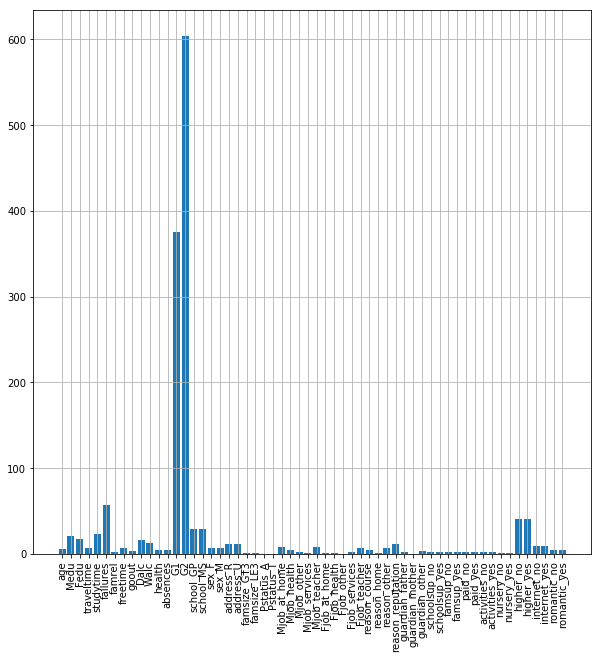

In [11]:
plt.figure(figsize = (10,10))
plt.bar(range(len(df_skb.columns)), -np.log(skb.pvalues_)) #такое пробразование для наилучшей визуализации: 
                                                           # -log, т.к. наилучшие значения близки к 0
plt.xticks(range(len(df_skb.columns)), df_skb.columns, rotation='vertical')
plt.grid(True)
plt.show()

In [12]:
#Видно, что наиболее сильно коррелируют G1 и G2

### Регрессия (Max 4)
Выберите один признак, который наиболее влияет на признак G3 и используя кросс-валидацию (cross-validation) выполните следующее:

- На обучающей выборке обучите объект [RidgeСV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html#sklearn.linear_model.RidgeCV) для различных alpha (0.2)
- Выберите alpha при котором RidgeCV лучше всего предсказывает значения (0.1)
- Подсчитайте метрику mean absolute error, mean squared error, median absolute error,r2 score(0.2)
- Max (0.5)
- ------------------------------------
- Создайте объекты [SGDRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#sklearn.linear_model.SGDRegressor), используя все возможных варианты аргумента penalty (0.2)
- Обучите все полученных объекты на обучающей выборке (0.1)
- Подсчитайте метрику r2 score для всех объектов (0.2)
- Max (0.5)
- ------------------------------------
- Создайте объекты с параметрами max_depth = 1,3, 10 [GradientBoostingRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn.ensemble.GradientBoostingRegressor) и для каждого объекта изменяйте количество n_estimators  от 100 до 1000 с шагом 100 (0.2)
- Подсчитайте метрику r2 score для всех объектов (0.1)
- Визуализируйте зависимость R2 oт n_estimators на графике (0.2)
- Max (0.5)
- -----------------------------------
- Используя все доступные регрессоры в библиотеке sklearn, найдите самый лучший регрессор. (2.5)

In [13]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.G2,df.G3)#G2 - наиболее сильно коррелирует
from sklearn.linear_model import RidgeCV
estim = RidgeCV(alphas=[0.001,0.01,0.1,1.5,2,2.5,10,50,100,500,550,600,700,800])
labels = ['mean absolute error','mean squared error','median absolute error','r2 score']
estim.fit(X_train.values.reshape(-1,1),y_train)
score = np.round(mean_absolute_error(y_test,estim.predict(X_test.values.reshape(-1,1))),5)
print("For {0} best alpha is {1} with score = {2}".format(labels[0],estim.alpha_,score))
score = np.round(mean_squared_error(y_test,estim.predict(X_test.values.reshape(-1,1))),5)
print("For {0} best alpha is {1} with score = {2}".format(labels[1],estim.alpha_,score))
score = np.round(median_absolute_error(y_test,estim.predict(X_test.values.reshape(-1,1))),5)
print("For {0} best alpha is {1} with score = {2}".format(labels[2],estim.alpha_,score))
score = np.round(r2_score(y_test,estim.predict(X_test.values.reshape(-1,1))),5)
print("For {0} best alpha is {1} with score = {2}".format(labels[3],estim.alpha_,score))

For mean absolute error best alpha is 1.5 with score = 0.80557
For mean squared error best alpha is 1.5 with score = 2.00987
For median absolute error best alpha is 1.5 with score = 0.63752
For r2 score best alpha is 1.5 with score = 0.79795


In [14]:
from sklearn.linear_model import SGDRegressor
penalties =  ['none', 'l2', 'l1', 'elasticnet']
for i in penalties:
    estim = SGDRegressor(penalty=i)
    estim.fit(X_train.values.reshape(-1,1),y_train)
    print("For penalty {0} r2 score = {1}".format(i,np.round(estim.score(X_test.values.reshape(-1,1),y_test),5)))

For penalty none r2 score = 0.79955
For penalty l2 r2 score = 0.73341
For penalty l1 r2 score = 0.79018
For penalty elasticnet r2 score = 0.80103


In [15]:
from sklearn.ensemble import GradientBoostingRegressor
max_depth = [1,3,10]
n_estimators = [100,200,300,400,500,600,700,800,900,1000]
grad_boosting = pnd.DataFrame(columns = n_estimators)
for i in range(len(max_depth)):
    lst = []
    for j in range(len(n_estimators)):
        estim = GradientBoostingRegressor(max_depth=max_depth[i],n_estimators=n_estimators[j])
        estim.fit(X_train.values.reshape(-1,1),y_train)
        score = r2_score(y_test,estim.predict(X_test.values.reshape(-1,1)))
        lst.append(score)
    grad_boosting.loc[i] = lst  
grad_boosting

,100,200,300,400,500,600,700,800,900,1000
0,0.791706,0.791324,0.788988,0.787404,0.786340,0.785669,0.785216,0.784940,0.784750,0.784627
1,0.784431,0.784404,0.784404,0.784404,0.784404,0.784404,0.784404,0.784404,0.784404,0.784404
2,0.784401,0.784404,0.784404,0.784404,0.784404,0.784404,0.784404,0.784404,0.784404,0.784404


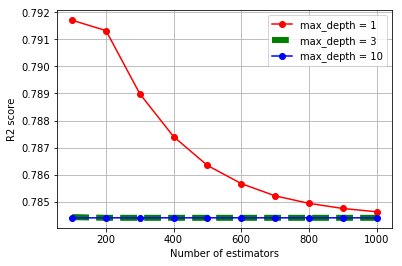

In [16]:
plt.plot(n_estimators,grad_boosting.iloc[0,:],'o-',label="max_depth = 1",color='r')
plt.plot(n_estimators,grad_boosting.iloc[1,:],'--',label="max_depth = 3",color='g',lw=6)
plt.plot(n_estimators,grad_boosting.iloc[2,:],'o-',label="max_depth = 10",color='b')
plt.xlabel("Number of estimators")
plt.ylabel("R2 score")
plt.legend()
plt.grid(True)
plt.show()

In [17]:
def regressor(regressor, name):
    regressor.fit(X_train.values.reshape(-1,1),y_train)
    score = regressor.score(X_test.values.reshape(-1,1),y_test)
    result_dict[name] = score
    print("{0}, score = {1}".format(name,score))

In [28]:
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
result_dict = {}
regressor(MLPRegressor(),"mlp neural network")
regressor(LinearRegression(),"linear regressor")
regressor(DecisionTreeRegressor(),"desicion tree regressor")
regressor(KNeighborsRegressor(),"kneighors regressor")
regressor(AdaBoostRegressor(),"ada boost regressor")

mlp neural network, score = 0.7988891221201325
linear regressor, score = 0.7979982622766241
desicion tree regressor, score = 0.7844044421937386
kneighors regressor, score = 0.750534496719463
ada boost regressor, score = 0.7694138930198652


In [29]:
result_df_reg = pnd.DataFrame(list(result_dict.items()),columns = ["Regressor","Score"])
result_df_reg

,Regressor,Score
0,mlp neural network,0.798889
1,linear regressor,0.797998
2,desicion tree regressor,0.784404
3,kneighors regressor,0.750534
4,ada boost regressor,0.769414


Наилучшими оказались MLP Regressor и Linear Regression.

### Классификация (Max 4)
- В статье описано использование Random Forest для предсказания важности факторов, влияющих на потребление алкоголя. Повторите эксперимент с использование объекта [RandomForest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier) и найдите наилучшие параметры. Укажите accuracy для наилучших параметров (0.5)
- Обучите объект [GradientBoostingClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier)  и найдите для него наилучшие параметры. Укажите accuracy для наилучших параметров (0.5)
- Обучите объект [AdaBoostClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html)  и найдите для него наилучшие параметры. Укажите accuracy для наилучших параметров (0.5)
- Найдите наилучший классификатор. Укажите accuracy для наилучших параметров (2.5)

In [31]:
df_new["Alc"] = None
df_new["Alc"] = (2*df["Walc"]+5*df["Dalc"])/7
from sklearn.preprocessing import Binarizer
binarizerr = Binarizer(threshold=3.0)
df_new["Alc"] = binarizerr.fit_transform(df_new["Alc"].values.reshape(-1,1))

In [32]:
X_train,X_test,y_train,y_test = train_test_split(df_new.drop(["Walc","Dalc","Alc"],axis=1),df_new["Alc"].values.ravel())
regressor_scores = {}

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier()
param_grid_rf = dict(max_features = [1,2,3,5,10],
                  n_estimators = [100,300,500,700,1000,5000,10000],
                  bootstrap = [True,False])
gscv_rf = GridSearchCV(rfc,param_grid = param_grid_rf)
gscv_rf.fit(X_train,y_train)
regressor_scores["Random forest"] = gscv_rf.score(X_test,y_test)
print('done')

done


In [34]:
print("Best features for Random Forest Classifieer are: max_features = {1}, n_estimators = {2} , bootstrap = {0} with score = {3}".format(
    gscv_rf.best_params_['bootstrap'],
    gscv_rf.best_params_['max_features'],
    gscv_rf.best_params_['n_estimators'],
    regressor_scores["Random forest"]
    ))

Best features for Random Forest Classifieer are: max_features = 1, n_estimators = 100 , bootstrap = True with score = 0.8588957055214724


In [35]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
param_grid_gbc = dict(learning_rate = [0.001,0.01,0.1,0.5,1],
                      n_estimators = [100,500,1000,5000],
                      max_features = [1,5,10]
                     )
gscv_gbc = GridSearchCV(gbc,param_grid = param_grid_gbc)
gscv_gbc.fit(X_train,y_train)
regressor_scores["Gradient Boosting Clasifier"] = gscv_gbc.score(X_test,y_test)
print('done')

done


In [36]:
print("Best features for Gradient Boosting Classifier are:  n_estimators = {1}, max_features = {2}, learning_rate = {0} with score = {3}".format(
    gscv_gbc.best_params_['learning_rate'],
    gscv_gbc.best_params_['n_estimators'],
    gscv_gbc.best_params_['max_features'],
    regressor_scores["Gradient Boosting Clasifier"]))

Best features for Gradient Boosting Classifier are:  n_estimators = 100, max_features = 1, learning_rate = 0.001 with score = 0.8588957055214724


In [43]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neighbors import KNeighborsClassifier
abc = AdaBoostClassifier()
param_grid_abc = dict(base_estimator = [DecisionTreeClassifier()],
                     n_estimators = [50,100,300,500,1000,5000,10000],
                     learning_rate = [0.01,0.1,0.5,1]
                     )
gscv_abc = GridSearchCV(abc,param_grid = param_grid_abc)
gscv_abc.fit(X_train,y_train)
regressor_scores["AdaBoost Clasifier"] = gscv_abc.score(X_test,y_test)
print('done')

done


In [44]:
print("Best parameters for AdaBoost Classifer based on DecisionTreeClassifiers are: learning rate = {0}, n_estimators = {1}, max_features = {2} with score = {3}".format(
    gscv_gbc.best_params_['learning_rate'],
    gscv_gbc.best_params_['n_estimators'],
    gscv_gbc.best_params_['max_features'],
    regressor_scores["AdaBoost Clasifier"]))

Best parameters for AdaBoost Classifer based on DecisionTreeClassifiers are: learning rate = 0.001, n_estimators = 100, max_features = 1 with score = 0.8220858895705522


In [45]:
dt = DecisionTreeClassifier()
param_grid_dt = dict(max_depth = [5,10,50,100],
                     )
gscv_dt = GridSearchCV(dt,param_grid = param_grid_dt)
gscv_dt.fit(X_train,y_train)
regressor_scores["Decision Tree Classifier"] = gscv_dt.score(X_test,y_test)
print('done')

done


In [46]:
print("Best max_depth for Desicion Tree Classifier is: {0} with score = {1}".format(gscv_dt.best_params_['max_depth'],regressor_scores["Decision Tree Classifier"]))

Best max_depth for Desicion Tree Classifier is: 5 with score = 0.8588957055214724


In [47]:
kn = KNeighborsClassifier()
param_grid_kn = dict(n_neighbors = [1,2,5,10],
                     )
gscv_kn = GridSearchCV(kn,param_grid = param_grid_kn)
gscv_kn.fit(X_train,y_train)
regressor_scores["KNeighbors Classifier"] = gscv_kn.score(X_test,y_test)
print('done')

done


In [48]:
print("Best n_neighbors for KNeighboursClassifier is: {0} with score = {1}".format(gscv_kn.best_params_['n_neighbors'],regressor_scores["KNeighbors Classifier"]))

Best n_neighbors for KNeighboursClassifier is: 2 with score = 0.852760736196319


In [49]:
from sklearn.svm import SVC
svc = SVC()
gscv_svc = None
param_grid_svc = dict(C = [0.01,0.1,1,5,10],
                     kernel = ['linear','rbf']
                     )
gscv_svc = GridSearchCV(svc,param_grid = param_grid_svc)
gscv_svc.fit(X_train,y_train)
regressor_scores["SVC"] = gscv_svc.score(X_test,y_test)
print('done')

done


In [50]:
print("Best parameters for SVC are: C = {0}, kernel = {1} with score = {2}".format(
    gscv_svc.best_params_['C'],
    gscv_svc.best_params_['kernel'],
    regressor_scores["SVC"]))

Best parameters for SVC are: C = 0.01, kernel = linear with score = 0.8588957055214724


In [63]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
param_grid_mlp = dict(hidden_layer_sizes = [(100,),(200,),(100,100),(100,200),(200,300)],
                      activation = ['relu','logistic','tanh'],
                      alpha = [0.0001,0.001,0.01,0.1])
gscv_mlp = GridSearchCV(mlp,param_grid = param_grid_mlp)
gscv_mlp.fit(X_train,y_train)
regressor_scores["MLP Classifier"] = gscv_mlp.score(X_test,y_test)
print('done')

done


In [70]:
print(gscv_mlp.score(X_train,y_train))

0.911522633745


In [64]:
print("Best parameters for MLP Classifier are: hidden_layer_sizes = {0}, activation = {1}, alpha = {2} with score = {3}".format(
    gscv_mlp.best_params_['hidden_layer_sizes'],
    gscv_mlp.best_params_['activation'],
    gscv_mlp.best_params_['alpha'],
    regressor_scores["MLP Classifier"]))

Best parameters for MLP Classifier are: hidden_layer_sizes = (200,), activation = relu, alpha = 0.0001 with score = 0.8588957055214724


In [68]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier()
param_grid_dummy = dict(strategy = ['stratified','most_frequent','prior','uniform'])
gscv_dummy = GridSearchCV(dummy,param_grid = param_grid_dummy)
gscv_dummy.fit(X_train,y_train)
regressor_scores["Dummy Classifier"] = gscv_dummy.score(X_test,y_test)
print('done')

done


In [69]:
result_df = pnd.DataFrame(list(regressor_scores.items()),columns = ["Classifier","Score"])
result_df

,Classifier,Score
0,Random forest,0.858896
1,Gradient Boosting Clasifier,0.858896
2,AdaBoost Clasifier,0.822086
3,Decision Tree Classifier,0.858896
4,KNeighbors Classifier,0.852761
5,SVC,0.858896
6,MLP Classifier,0.858896
7,Dummy Classifier,0.858896


MLP Classifier показал наилучший результат, достигнув точности в 0.858896. (Точност на обучающей = 0.91152 - не переобучаилась)
Обучился быстро, почти подогнал веса под предметную область

# Замечания

- В работе следует использовать библиотеку scikit-learn версии 0.18 и scipy версии 0.18.1